In [ ]:
# !gdown --folder https://drive.google.com/drive/folders/1vYRAO1Jz3hvf157AOXOBOhnG_46RArv1

Retrieving folder list
Retrieving folder 1WU2LR9i0EjA4byUd_A8AUoLqdDXcGk70 Brooklyn
Processing file 12WUZZtyDjU2TTQu3NDbnpT-6aCDOW7qi Starbucks 1.json
Processing file 19gFDKh9brj13rUHzGQrW5xdMn_WVI-2F Starbucks 2.json
Processing file 18h25Take5qgmnrenp48Boud_td3MpX8D Starbucks 3.json
Processing file 1i57TVqJi99YqCLAnBdj87xjWNJecuVNb Starbucks 4.json
Processing file 14jpwYmGgXccwF36K9S2w3Y9MOe6pihnt Starbucks 5.json
Processing file 1fn-UC9080rKJtPTqjt0KKd4x9XEy5rHQ Starbucks 6.json
Processing file 1DfSnC2akYGpg0ccn1nixWDPdUbKo8Ky_ Starbucks 7.json
Processing file 128YSQECaM7MYelLXk6FZbBkoH2HnDGDq Starbucks 8.json
Processing file 1DQc_NvpyXYWjhT8bHoGHkaP1QffKuH0j Starbucks 9.json
Processing file 16PYMLs5R5VUTH3DaI3gdvsh6qJSdT5zA Starbucks 10.json
Processing file 1BK_Id-IO9USNIvm6YwJ2-rzPK--kyFqW Starbucks 11.json
Processing file 1c7nuvbmiJsQG0Hwypsy1o8JcomZRNsWN Starbucks 12.json
Processing file 1KaB2A7k0Kw6byw4opz8P8VMtk86vLV1Q Starbucks 13.json
Processing file 1n_QSkEODtwWa7JzxmsFJ05WI

In [ ]:
# !pip install pyabsa==1.9.0

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 204 kB 9.6 MB/s eta 0:00:01
     |███████████▉                    | 327.6 MB 115.4 MB/s eta 0:00:05

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████▉       | 683.7 MB 39.1 MB/s eta 0:00:063

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 881.9 MB 25 kB/s s eta 0:00:01
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0
  Attempting uninstall: pyabsa
    Found existing installation: PyABSA 1.16.25
    Uninstalling PyABSA-1.16.25:
      Successfully uninstalled PyABSA-1.16.25
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.14.0 requires torch==1.13.0, but you have torch 1.10.2 which is incompatible.
boostaug 2.2.5 requires pyabsa>=1.16.14, but you have pyabsa 1.9.0 which is incompatible.


In [ ]:
import pickle5 as pickle
import pandas as pd
import numpy as np
import os

DATA_PATH = "New York"
AREAS = ["Mannhattan", "Brooklyn", "Staten Island", "Bronx", "Queens"]

In [ ]:
from nltk import tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/yukei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def remove_newline(row: str):
    import re
    return re.sub(" +", " ", row.replace("\n", "").strip())

In [ ]:
import hashlib

catelogs = {}
catelogs_df = None
for area in AREAS:
    c = pd.read_excel(os.path.join("New York/catalog.xlsx"), sheet_name=area)
    c = c[c.Store == "Starbucks"]
    c['store_id'] = c.apply(lambda x: hashlib.sha256(x["Address"].encode('utf-8')).hexdigest()[:64], axis=1)
    c['area'] = area
    catelogs[area] = c
    catelogs_df = c if catelogs_df is None else catelogs_df.append(c)

In [ ]:
catelogs_df

,File Name (json format),Store,Address,Reviews,store_id,area
0,Starbucks 1,Starbucks,"13-25 Astor Pl, New York, NY 10003",NaN,0bda00134ed6ff211cc3d43785021c07266a6d5b72f6d2...,Mannhattan
1,Starbucks 2,Starbucks,"45 West 4th Street, New York, NY 10012",https://www.google.com/maps/place/Starbucks/@4...,be4971ec366404c7f9e353635991061357553fa2b34491...,Mannhattan
2,Starbucks 3,Starbucks,"665 Broadway, New York, NY 10012",https://www.google.com/maps/place/Starbucks/@4...,ea388da863bb4a46713aae18ee0aa8aabbc3f1dc9e342b...,Mannhattan
3,Starbucks 4,Starbucks,"482 W Broadway, New York, NY 10012",https://www.google.com/maps/place/Starbucks/@4...,6f405f516678de670b3aca435cdb6f71bf340f4a40ae24...,Mannhattan
4,Starbucks 5,Starbucks,"72 Spring St, New York, NY 10012",NaN,76bc72ecb66201799a70c1eaf982c2e7fef18cd2eae33f...,Mannhattan
...,...,...,...,...,...,...
28,Starbucks 29,Starbucks,"32-2 Francis Lewis Blvd, Queens, NY 11358",https://www.google.com/maps/place/Starbucks/@4...,84fb86d3f4ff91a71511800c9f97551f8114586f23d214...,Queens
29,Starbucks 30,Starbucks,"56-45 Main St, Queens, NY 11355",https://www.google.com/maps/place/Starbucks/@4...,e65257d4dcd1b6b51fd67f94121dd06c2d7ecb5364d7c5...,Queens
30,Starbucks 31,Starbucks,"221-04 Springfield Boulevard A, B Horace Hardi...",https://www.google.com/maps/place/Starbucks/@4...,9c288fa95a37850a1969c1be9b17c4da5bead902b9b5db...,Queens
31,Starbucks 32,Starbucks,"8900 Sutphin Blvd, Queens, NY 11435",https://www.google.com/maps/place/Starbucks/@4...,cff4d99938712f6e57db2b12d58be295ac6e9b887ba3c2...,Queens


In [ ]:
import json

def load_from_json(row, loc):
    file = row["File Name (json format)"]
    store_id = row["store_id"]
    review_rows = []
    try:
        with open(os.path.join(DATA_PATH, loc, file+'.json'), 'r') as f:
            contents = f.read()
        # fix broken json
        contents = json.loads(contents + "]")
        for content in contents:
            review_id = hashlib.sha256((content["Reviewer"] + content["Review_time"] + content["Review"]).encode('utf-8')).hexdigest()[:64]
            # discard empty review
            if len(content["Review"]) == 0:
                continue
            review_rows.append([review_id, store_id] + list(content.values()))
    except:
        print(f"{loc}: {file} not found.")
    return review_rows

def clean_review_pipeline(row):
    import re
    text = row.Review
    
    # remove new line
    text = re.sub(" +", " ", text.replace("\n", "").strip())
    
    # strip
    text = text.strip()
    
    # use translated result
    if (z := re.match(r"\(Translated by Google\) (.*)\(Original\)", text)):
        text = z.group(1)
    
    # remove emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    text = emoji_pattern.sub(r'', text) # no emoji
    
    return text

def review_date_extractor(row):
    import re
    from datetime import datetime, timedelta

    delta_text = row.Review_time
    deltas = delta_text.split(" ")
    review_time = datetime.now()
    
    delta = deltas[0]
    if delta == "a":
        delta = 1
    else:
        delta = int(delta)
    
    if "month" in deltas[1]:
        review_time = review_time - timedelta(days = delta * 30)
    elif "week" in deltas[1]:
        review_time = review_time - timedelta(days = delta * 7)
    elif "year" in deltas[1]:
        review_time = review_time - timedelta(days = delta * 365)
    
    return review_time.strftime("%Y-%m-%d")

def group_sentence(text_list, max_length=100):
    res = []
    level = ""
    cur_word = 0
    for text in text_list:
        cur_word += len(tokenize.word_tokenize(text))
        if cur_word > max_length:
            res.append(level.strip())
            level = text
            cur_word = len(text.split(" "))
        else:
            level += " " + text
    res.append(level.strip())
    return res

def process_pipeline(catelog, loc):
    reviews = []
    ks = ['review_id', 'store_id', 'Name', 'Category', 'Rating', 'Number_of_Reviews', 'Address', 'Reviewer', 'Reviewer_page', 'Review_time', 'Review', 'Likes']
    for i in range(catelog.shape[0]):
        row = catelog.iloc[i, :]
        reviews.extend(load_from_json(row, loc))
    reviews = pd.DataFrame(reviews, columns=ks)
    reviews = reviews[~reviews.review_id.duplicated()]
    reviews["Rating"] = reviews.Rating.apply(lambda row: row.strip().split(" ")[0])
    
    reviews["cleaned"] = reviews.apply(clean_review_pipeline, axis=1)
    reviews["sentences"] = reviews["cleaned"].apply(lambda x: tokenize.sent_tokenize(x))
    reviews["sentences2"] = reviews["sentences"].apply(group_sentence)
    reviews["n_sentences"] = reviews["sentences2"].apply(lambda rows: len(rows))
    reviews["ts"] = reviews.apply(review_date_extractor, axis=1)
    
    return reviews

In [ ]:
reviews = {}
all_reviews_df = None
for area in AREAS:
    r = process_pipeline(catelogs[area], area)
    reviews[area] = r
    all_reviews_df = r if all_reviews_df is None else all_reviews_df.append(r)
all_reviews_df = all_reviews_df.reset_index(drop=True)

In [ ]:
all_reviews_df

,review_id,store_id,Name,Category,Rating,Number_of_Reviews,Address,Reviewer,Reviewer_page,Review_time,Review,Likes,cleaned,sentences,sentences2,n_sentences,ts
0,bf6881901c1018bb0a1949e1c03072a80a2bd3b4ed14b9...,0bda00134ed6ff211cc3d43785021c07266a6d5b72f6d2...,,,1,,,daniella guigliano,https://www.google.com/maps/contrib/1182396732...,a month ago,I ordered an iced pumpkin spice latte with col...,,I ordered an iced pumpkin spice latte with col...,[I ordered an iced pumpkin spice latte with co...,[I ordered an iced pumpkin spice latte with co...,1,2022-10-28
1,216d59b03306b368df5fb5967a5ab2526d5b59458689d2...,0bda00134ed6ff211cc3d43785021c07266a6d5b72f6d2...,,,5,,,Michael James Miller,https://www.google.com/maps/contrib/1109391450...,6 months ago,Very clean they checked vaccination make you w...,1,Very clean they checked vaccination make you w...,[Very clean they checked vaccination make you ...,[Very clean they checked vaccination make you ...,1,2022-05-31
2,688adadf52dc9cd9ffe53974c8c56d78c5c9533a3e349b...,0bda00134ed6ff211cc3d43785021c07266a6d5b72f6d2...,,,5,,,Leonardo Torres,https://www.google.com/maps/contrib/1100680349...,a year ago,This is one cool Starbucks. As expected the dr...,,This is one cool Starbucks. As expected the dr...,"[This is one cool Starbucks., As expected the ...",[This is one cool Starbucks. As expected the d...,1,2021-11-27
3,e6142d56e4613418eadf642eb88f0b433fdd3cd4e8adf7...,0bda00134ed6ff211cc3d43785021c07266a6d5b72f6d2...,,,4,,,Lakshya Budhiraja,https://www.google.com/maps/contrib/1112389084...,3 weeks ago,Best Starbucks in the NYC downtown area. Beats...,,Best Starbucks in the NYC downtown area. Beats...,"[Best Starbucks in the NYC downtown area., Bea...",[Best Starbucks in the NYC downtown area. Beat...,1,2022-11-06
4,2e26d722e75fdec4da3145beb78396db30df0d8f1f2244...,0bda00134ed6ff211cc3d43785021c07266a6d5b72f6d2...,,,5,,,Laith Hofayz,https://www.google.com/maps/contrib/1166785090...,3 years ago,Love this particular Starbucks! One of the bi...,,Love this particular Starbucks! One of the big...,"[Love this particular Starbucks!, One of the b...",[Love this particular Starbucks! One of the bi...,1,2019-11-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33151,dc6a5b221713a327eeccd7bca7d3f07b6a3e51fe815a46...,7bb0f9676d9eaee5e046edb52470220ff6205bc14276c2...,,,3,,,Pitufresa Rockyazul,https://www.google.com/maps/contrib/1154190656...,4 years ago,(Translated by Google) I like it\n\n(Original)...,,I like it,[I like it],[I like it],1,2018-11-28
33152,80333d781a44478833a6fef57e1915501277073b048ec0...,7bb0f9676d9eaee5e046edb52470220ff6205bc14276c2...,,,4,,,Ines Anaya,https://www.google.com/maps/contrib/1154614236...,3 years ago,(Translated by Google) It's very cozy.\n\n(Ori...,1,It's very cozy.,[It's very cozy.],[It's very cozy.],1,2019-11-28
33153,e1f225be51149ec2dfa7a83e8ab8247b8e4188eb0a0918...,7bb0f9676d9eaee5e046edb52470220ff6205bc14276c2...,,,1,,,Eduardo narvaez mendez,https://www.google.com/maps/contrib/1039588384...,2 years ago,(Translated by Google) The\n\n(Original)\nEl,,The,[The],[The],1,2020-11-27
33154,585aa15848cbd7d7c9d430869676c4eb53e3232d6f6b62...,7bb0f9676d9eaee5e046edb52470220ff6205bc14276c2...,,,3,,,Andreas Esposito,https://www.google.com/maps/contrib/1155940232...,4 years ago,(Translated by Google) It's just a Starbucks!\...,,It's just a Starbucks!,[It's just a Starbucks!],[It's just a Starbucks!],1,2018-11-28


In [ ]:
# from pyabsa.functional import ATEPCModelList
# from pyabsa.functional import Trainer, ATEPCTrainer
# from pyabsa.functional import ABSADatasetList
# from pyabsa.functional import ATEPCConfigManager

In [ ]:
from pyabsa.functional import ATEPCCheckpointManager
aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(checkpoint="si699/fast_lcf_atepc_Restaurant14_cdw_apcacc_87.21_apcf1_81.31_atef1_86.53")

2022-11-27 12:51:32.148094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-27 12:51:37.159737: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib64:
2022-11-27 12:51:37.159762: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-27 12:51:37.476567: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-27 12:51:55.3035

Version 0.6.3 of metric_visualizer is outdated. Version 0.6.6 was released 3 days ago.
Remote ABSADataset version: 2022.10.25 Local ABSADatasets version: 2022.10.24
There is a new version of ABSADatasets(2022.10.25), please remove the downloaded datasets to automatically download the new version.
Version 1.9.0 of pyabsa is outdated. Version 2.0.11 was released 3 days ago.
check release notes at https://github.com/yangheng95/PyABSA/blob/release/release-note.json
Load aspect extractor from fast_lcf_atepc_Restaurant14_cdw_apcacc_87.21_apcf1_81.31_atef1_86.53
config: fast_lcf_atepc_Restaurant14_cdw_apcacc_87.21_apcf1_81.31_atef1_86.53/fast_lcf_atepc.config
state_dict: fast_lcf_atepc_Restaurant14_cdw_apcacc_87.21_apcf1_81.31_atef1_86.53/fast_lcf_atepc.state_dict
model: None
tokenizer: fast_lcf_atepc_Restaurant14_cdw_apcacc_87.21_apcf1_81.31_atef1_86.53/fast_lcf_atepc.tokenizer


/home/yukei/.local/lib/python3.9/site-packages/pyabsa/core/atepc/prediction/aspect_extractor.py:69: ResourceWarning: unclosed file <_io.BufferedReader name='fast_lcf_atepc_Restaurant14_cdw_apcacc_87.21_apcf1_81.31_atef1_86.53/fast_lcf_atepc.config'>
  self.opt = pickle.load(open(config_path, mode='rb'))
Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2Model: ['mask_predictions.classifier.weight', 'mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.dense.bias', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceC

Config used in Training:
ABSADatasetsVersion:None	-->	Calling Count:0
IOB_label_to_index:{'B-ASP': 1, 'I-ASP': 2, 'O': 3, '[CLS]': 4, '[SEP]': 5}	-->	Calling Count:1
MV:<metric_visualizer.metric_visualizer.MetricVisualizer object at 0x1523d464cb50>	-->	Calling Count:0
PyABSAVersion:1.16.18	-->	Calling Count:0
SRD:3	-->	Calling Count:9444
TorchVersion:1.12.1+cu113+cuda11.3	-->	Calling Count:0
TransformersVersion:4.22.2	-->	Calling Count:0
auto_device:True	-->	Calling Count:2126
batch_size:16	-->	Calling Count:5
cache_dataset:True	-->	Calling Count:1
dataset_file:{'train': ['integrated_datasets/atepc_datasets/110.SemEval/114.restaurant14/Restaurants_Train.xml.seg.atepc'], 'test': ['integrated_datasets/atepc_datasets/110.SemEval/114.restaurant14/Restaurants_Test_Gold.xml.seg.atepc'], 'valid': []}	-->	Calling Count:91
dataset_name:Restaurant14	-->	Calling Count:34
device:cuda:0	-->	Calling Count:72709
device_name:Tesla T4	-->	Calling Count:0
dropout:0.5	-->	Calling Count:2
dynamic_truncate

In [ ]:
import itertools
atepc_result = aspect_extractor.extract_aspect(inference_source=list(itertools.chain(*all_reviews_df["sentences2"])),
                                               save_result=True,
                                               print_result=False,  # print the result
                                               pred_sentiment=True,  # Predict the sentiment of extracted aspect terms
                                               )

/home/yukei/.local/lib/python3.9/site-packages/transformers/models/deberta_v2/modeling_deberta_v2.py:745: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attention_scores = torch.bmm(query_layer, key_layer.transpose(-1, -2)) / torch.tensor(
/home/yukei/.local/lib/python3.9/site-packages/pyabsa/core/atepc/prediction/aspect_extractor.py:352: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  lcf_cdm_vec = torch.tensor([f.lcf_cdm_vec for f in infer_features], dtype=torch.float32)


The results of aspect term extraction have been saved in /home/yukei/si699/atepc_inference.result.json


/home/yukei/.local/lib/python3.9/site-packages/pyabsa/core/atepc/prediction/aspect_extractor.py:222: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/yukei/si699/atepc_inference.result.json' mode='w' encoding='UTF-8'>
  json.dump(json.JSONEncoder().encode({'results': results}), open(save_path, 'w'), ensure_ascii=False)


In [ ]:
import json
with open("starbucks_result.json", "r") as f:
    atepc_result = json.load(f)

{'sentence': 'i ordered an iced pumpkin spice latte with cold foam , and they gave me an iced latte . it ’ s not even a little bit orange , or sweet . i payed 9 . 5 0 for it and they didn ’ t even give me the actual drink i ordered . i didn ’ t notice until i got home to drink it , and it ’ s too far to go back and ask for a new one but goodness was i dissapointed .',
 'IOB': ['O',
  'O',
  'O',
  'B-ASP',
  'I-ASP',
  'I-ASP',
  'I-ASP',
  'I-ASP',
  'I-ASP',
  'I-ASP',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-ASP',
  'I-ASP',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-ASP',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  '[SEP]',
  '[SEP]',
  '[CLS]',
  '[CLS]',
  '[CLS]',
  '[CLS]'],
 'to

In [ ]:
import nltk
nltk.download('wordnet')
lemma = nltk.wordnet.WordNetLemmatizer()

def extract_inference_results(df, results):
    pt = 0
    row_list = []
    for i in range(df.shape[0]):
        row = df.iloc[i, :]
        n_sentences = row.n_sentences
        n_results = results[pt: pt+n_sentences]
        aspects = []
        sentiments = []
        aspect_sentiments = []
        # probs = []
        # confidences = []
        for r in n_results:
            aspects.extend([lemma.lemmatize(aspect.lower()) for aspect in r['aspect']])
            sentiments.extend(r['sentiment'])
            for idx in range(len(r['aspect'])):
                aspect_sentiments.append([r['aspect'][idx], r['sentiment'][idx]])
            # probs.extend(r['probs'])
            # confidences.extend(r['confidence'])
        # row_list.append([row.review_id, aspects, sentiments, aspect_sentiments, probs, confidences])
        row_list.append([row.review_id, aspects, sentiments, aspect_sentiments])
        pt += n_sentences
    
    # return pd.DataFrame(row_list, columns=["review_id", "aspects", "sentiments", "aspect_sentiments", "probs", "confidences"])
    return pd.DataFrame(row_list, columns=["review_id", "aspects", "sentiments", "aspect_sentiments"])

[nltk_data] Downloading package wordnet to /home/yukei/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
inference_df = extract_inference_results(all_reviews_df, atepc_result)
review_infer = all_reviews_df.merge(inference_df, how='left', left_on="review_id", right_on="review_id")

In [ ]:
def group_aspects(row):
    return list(itertools.chain(*row))
    
# m_starbucks_review_infer.groupby('store_id').agg({"aspects": group_aspects})

In [ ]:
all_aspects = review_infer.aspects
all_aspects = list(itertools.chain(*all_aspects))
all_aspects = list(set(all_aspects))

In [ ]:
all_aspects

['marshmallow',
 'security guard',
 'of cream to coffee to sweetener',
 'pistachio cappuccino',
 'cold - brew',
 'padded chairs',
 'venti cloud',
 'natural light',
 'plugs for laptops',
 'plain croissant',
 'glass full of ice',
 'a cup',
 'wrapping paper',
 'line up',
 'hair guy',
 'lady on bar',
 'non - fat',
 'whole beans',
 'grande size',
 'caramel macchiatos',
 'white chedder',
 'cordusio',
 'wipe',
 'power supply',
 'house',
 'snack options',
 'fresh brewed dark roast coffee',
 'times square exclusive mugs',
 'french vanilla',
 'styles of coffee available',
 'bathroom door lock',
 'pumpkin appetizers',
 'strawberry funnel cake frappuccino',
 'hill',
 'caramel ribbon crunch frappuccino',
 'roasting process',
 'charging heads',
 'cashier name tag jack',
 'salted carmel',
 'delivery notes',
 'antibiotic',
 'closing hours',
 'bariatas',
 'skin milk',
 'traquilo',
 'reserves bar',
 'charging plugs',
 'coffee factory',
 'hot decaf coffee',
 'cold smoked coffe',
 'hot vanilla cream',
 'l

In [ ]:
# sentence transformer
# !pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
# model = SentenceTransformer('mrm8488/electricidad-small-finetuned-restaurant-sentiment-analysis')

#Sentences are encoded by calling model.encode()
embeddings = model.encode(all_aspects)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=300, n_iter=500)
tsne_results = tsne.fit_transform(embeddings)

[t-SNE] Computing 901 nearest neighbors...
[t-SNE] Indexed 7164 samples in 0.002s...
[t-SNE] Computed neighbors for 7164 samples in 2.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7164
[t-SNE] Computed conditional probabilities for sample 2000 / 7164
[t-SNE] Computed conditional probabilities for sample 3000 / 7164
[t-SNE] Computed conditional probabilities for sample 4000 / 7164
[t-SNE] Computed conditional probabilities for sample 5000 / 7164
[t-SNE] Computed conditional probabilities for sample 6000 / 7164
[t-SNE] Computed conditional probabilities for sample 7000 / 7164
[t-SNE] Computed conditional probabilities for sample 7164 / 7164
[t-SNE] Mean sigma: 0.402582
[t-SNE] KL divergence after 50 iterations with early exaggeration: 65.785927
[t-SNE] KL divergence after 500 iterations: 1.490263


<AxesSubplot:>

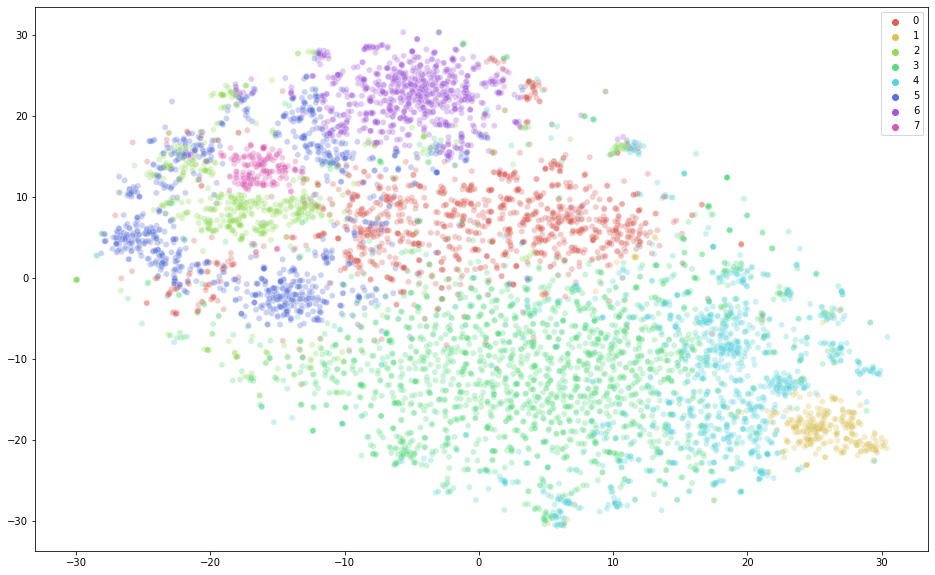

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import MiniBatchKMeans
K = 8
labels = MiniBatchKMeans(n_clusters=K, random_state=0, batch_size=32, max_iter=1000).fit_predict(embeddings)

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    palette=sns.color_palette("hls", K),
    hue=labels,
    legend="full",
    alpha=0.3
)

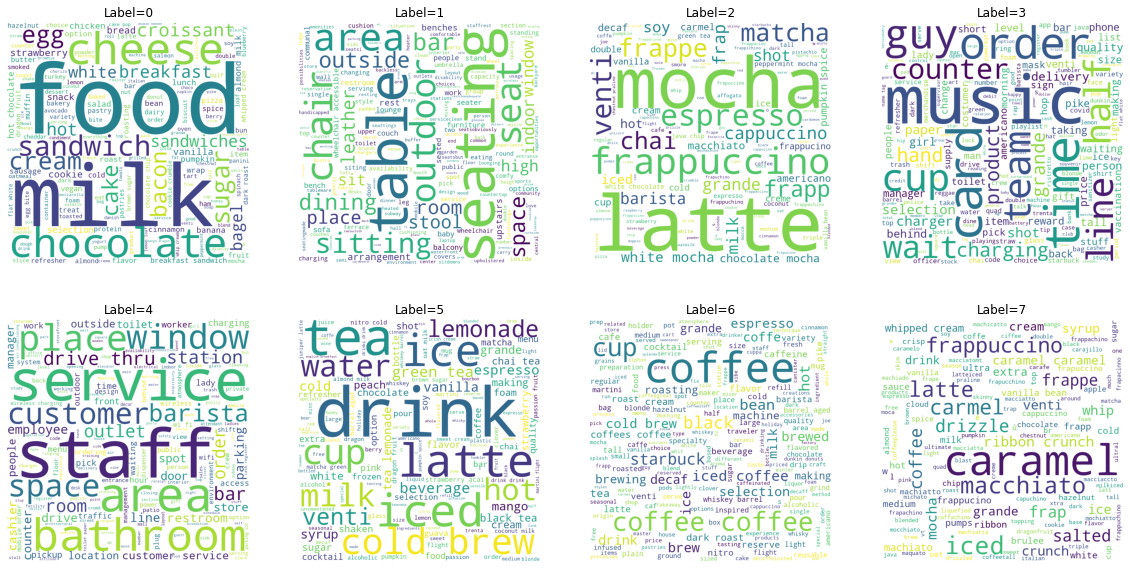

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

nrow = 2
ncol = 4

fig, axs = plt.subplots(nrow, ncol, figsize=(20, 10), facecolor = None)

axs.shape
for i in range(K):
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(" ".join(np.array(all_aspects)[np.where(labels==i)]))
    axs[i // ncol][i % ncol].imshow(wordcloud)
    axs[i // ncol][i % ncol].axis("off")
    axs[i // ncol][i % ncol].set_title(f"Label={i}")

In [ ]:
# combine labels

# ["food", "seat", "coffee", "order", "service"]

labels[np.where(labels==5)] = 2
labels[np.where(labels==6)] = 2
labels[np.where(labels==7)] = 2

ValueError: We need at least 1 word to plot a word cloud, got 0.

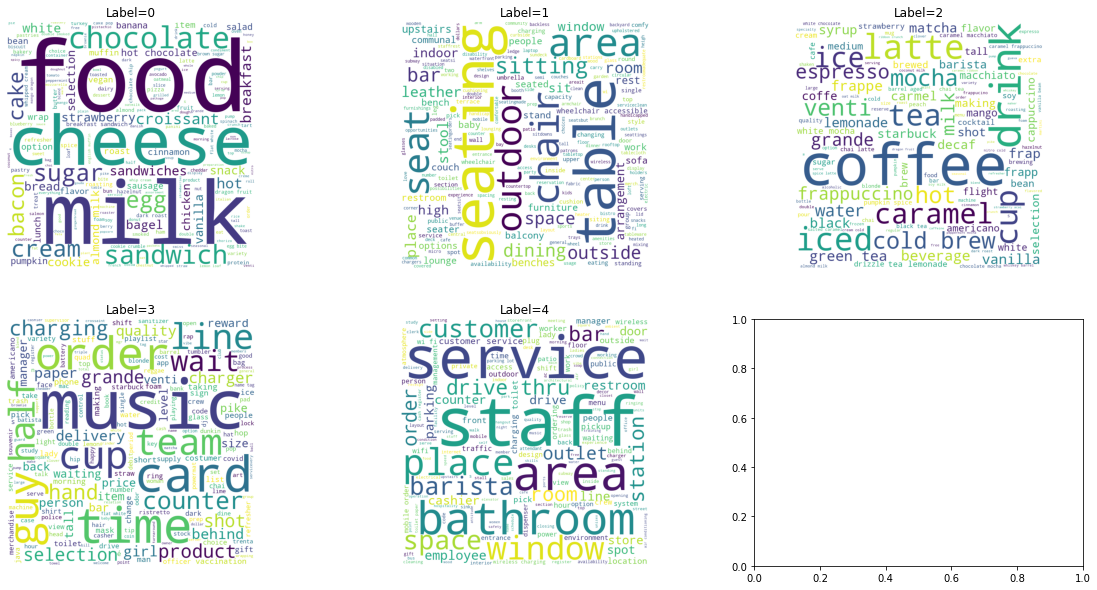

In [ ]:
nrow = 2
ncol = 3

fig, axs = plt.subplots(nrow, ncol, figsize=(20, 10), facecolor = None)

axs.shape
for i in range(K):
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(" ".join(np.array(all_aspects)[np.where(labels==i)]))
    axs[i // ncol][i % ncol].imshow(wordcloud)
    axs[i // ncol][i % ncol].axis("off")
    axs[i // ncol][i % ncol].set_title(f"Label={i}")

In [ ]:
all_aspects_dict = dict(zip(all_aspects, labels))

In [ ]:
all_areas_refer = catelogs_df.loc[:, ["Address", "store_id", "area"]].merge(review_infer.drop("Address", axis=1), how='inner', left_on="store_id", right_on="store_id")

In [ ]:
from collections import Counter

area_as = {}
labels = {}
labels_means = {}
for area in AREAS:
    aspect_sentiments = all_areas_refer[all_areas_refer.area==area].groupby("store_id").agg({"aspect_sentiments": group_aspects})
    
    as_counter = {}
    for idx, row in aspect_sentiments.iterrows():
        pos = []
        neu = []
        neg = []
        for aspect, sent in row[0]:
            if sent == "Positive":
                pos.append(all_aspects_dict[lemma.lemmatize(aspect.lower())])
            elif sent == "Negative":
                neg.append(all_aspects_dict[lemma.lemmatize(aspect.lower())])
            else:
                neu.append(all_aspects_dict[lemma.lemmatize(aspect.lower())])
        as_counter[idx+"_POS"] = Counter(pos)
        as_counter[idx+"_NEG"] = Counter(neg)
        as_counter[idx+"_NEU"] = Counter(neu)
    
    label = pd.DataFrame(as_counter).sort_index().T
    label.index = label.index.str.split("_", expand=True)
    label = label.rename_axis(['store_id','sentiment'])
    label["total"] = label.apply(lambda x: x.sum(), axis=1)
    label = label.apply(lambda x: x / x["total"], axis=1)
    label = label.fillna(0)
    
    tmp = pd.DataFrame(as_counter).sort_index().T
    tmp.index = tmp.index.str.split("_", expand=True)
    tmp = tmp.rename_axis(['store_id','sentiment'])
    labels_mean = tmp.groupby(['sentiment']).mean()
    labels_mean["total"] = labels_mean.apply(lambda x: x.sum(), axis=1)
    labels_mean = labels_mean.apply(lambda x: x / x["total"], axis=1)

    area_as[area] = as_counter
    labels[area] = label
    labels_means[area] = labels_mean

In [ ]:
labels_means["Mannhattan"]

,0,1,2,3,4,total
sentiment,,,,,,
NEG,0.074493,0.059336,0.239440,0.343729,0.283002,1.0
NEU,0.128346,0.040018,0.452150,0.238798,0.140687,1.0
POS,0.077373,0.044320,0.273025,0.274260,0.331022,1.0


In [ ]:
labels["Mannhattan"]

0  \
store_id                                           sentiment             
02b4e1cbe363b1ea14e8da6554e1ed54146b1bad752f184... POS        0.048193   
                                                   NEG        0.062315   
                                                   NEU        0.079646   
02c897e7a3501adc4bd9b7fbc8fbbfdaa53808aea5c6093... POS        0.061404   
                                                   NEG        0.107692   
...                                                                ...   
f45b3872d884a606aeca0eb099cd63e27dc3b5f78086990... NEG        0.046667   
                                                   NEU        0.111111   
f62b1baded2f68fe6396d547e9695686f31542861da9aa6... POS        0.030303   
                                                   NEG        0.117647   
                                                   NEU        0.000000   

                                                                     1  \
store_id                                           sentiment             
02b4e1cbe363b1ea14e8da6554e1ed54146b1bad752f184... POS        0.021084   
                                                   NEG        0.047478   
                                                   NEU        0.026549   
02c897e7a3501adc4bd9b7fbc8fbbfdaa53808aea5c6093... POS        0.017544   
                                                   NEG        0.061538   
...                                                                ...   
f45b3872d884a606aeca0eb099cd63e27dc3b5f78086990... NEG        0.036667   
                                                   NEU        0.018519   
f62b1baded2f68fe6396d547e9695686f31542861da9aa6... POS        0.030303   
                                                   NEG        0.000000   
                                                   NEU        0.000000   

                                                                     2  \
store_id                                           sentiment             
02b4e1cbe363b1ea14e8da6554e1ed54146b1bad752f184... POS        0.243976   
                                                   NEG        0.311573   
                                                   NEU        0.504425   
02c897e7a3501adc4bd9b7fbc8fbbfdaa53808aea5c6093... POS        0.280702   
                                                   NEG        0.307692   
...                                                                ...   
f45b3872d884a606aeca0eb099cd63e27dc3b5f78086990... NEG        0.246667   
                                                   NEU        0.537037   
f62b1baded2f68fe6396d547e9695686f31542861da9aa6... POS        0.232323   
                                                   NEG        0.176471   
                                                   NEU        0.285714   

                                                                     3  \
store_id                                           sentiment             
02b4e1cbe363b1ea14e8da6554e1ed54146b1bad752f184... POS        0.286145   
                                                   NEG        0.350148   
                                                   NEU        0.283186   
02c897e7a3501adc4bd9b7fbc8fbbfdaa53808aea5c6093... POS        0.298246   
                                                   NEG        0.261538   
...                                                                ...   
f45b3872d884a606aeca0eb099cd63e27dc3b5f78086990... NEG        0.330000   
                                                   NEU        0.203704   
f62b1baded2f68fe6396d547e9695686f31542861da9aa6... POS        0.292929   
                                                   NEG        0.294118   
                                                   NEU        0.285714   

                                                                     4  total  
store_id                                           sentiment                   
02b4e1cbe363b1ea14e8da6554e1ed54146b1bad752f184... POS   

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
categories=["food", "seat", "coffee", "env", "service"]
N = len(categories)

In [ ]:
labels_means[area]

,0,1,2,3,4,total
sentiment,,,,,,
NEG,0.074493,0.059336,0.239440,0.343729,0.283002,1.0
NEU,0.128346,0.040018,0.452150,0.238798,0.140687,1.0
POS,0.077373,0.044320,0.273025,0.274260,0.331022,1.0


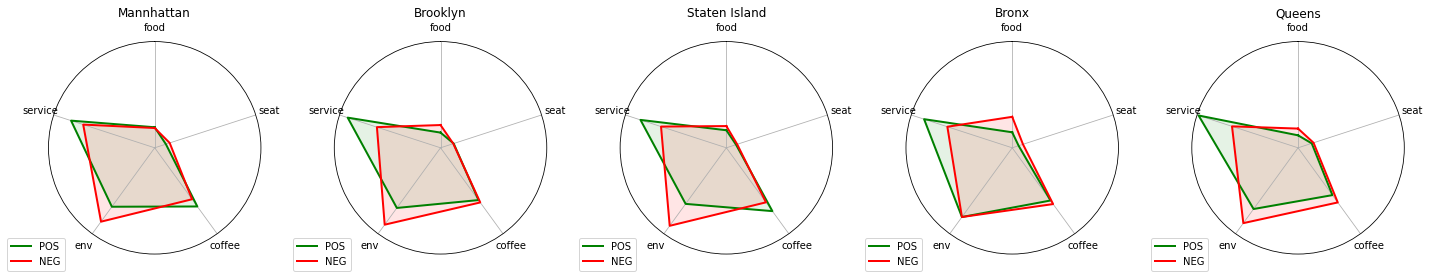

In [ ]:
fig, axs = plt.subplots(1, len(AREAS), figsize=(20, 10), facecolor = None)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for idx, area in enumerate(AREAS):
    df = labels_means[area]

    # Initialise the spider plot
    ax = plt.subplot(1, len(AREAS), idx+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,0.4)


    p_values=df.loc["POS"].drop('total').values.flatten().tolist()
    p_values += p_values[:1]
    ax.plot(angles, p_values, linewidth=2, linestyle='solid', c="g", label="POS")
    ax.fill(angles, p_values, 'g', alpha=0.1)

    n_values=df.loc["NEG"].drop('total').values.flatten().tolist()
    n_values += n_values[:1]
    ax.plot(angles, n_values, linewidth=2, linestyle='solid', c="r", label="NEG")
    ax.fill(angles, n_values, 'r', alpha=0.1)

    # Add legend
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    ax.set_title(f"{area}")

plt.tight_layout()

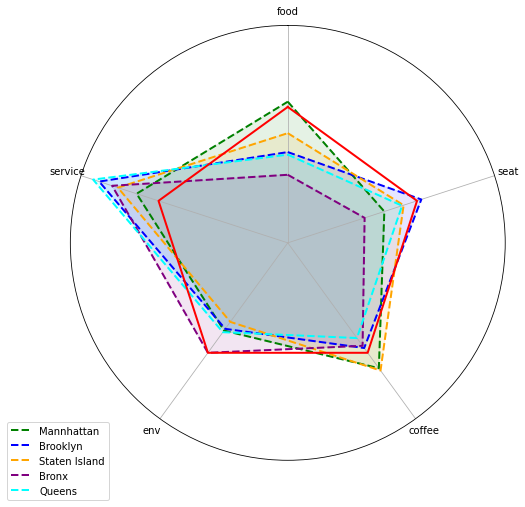

In [ ]:
# ratio

plt.figure(figsize=(8,8))

# Initialise the spider plot
ax = plt.subplot(1, 1, 1, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,1.6)

for idx, area in enumerate(AREAS):
    df = labels_means[area]
    colors = ["green", "blue", "orange", "purple", "cyan", "red"]

    p_values=df.loc["POS"].drop('total').values.flatten().tolist()
    p_values += p_values[:1]
    n_values=df.loc["NEG"].drop('total').values.flatten().tolist()
    n_values += n_values[:1]
    
    ratios = np.array(p_values) / np.array(n_values)
    
    ax.plot(angles, ratios, linewidth=2, linestyle='dashed', c=colors[idx], label=area)
    ax.fill(angles, ratios, c=colors[idx], alpha=0.1)

ax.plot(angles, [1]*len(ratios), linewidth=2, linestyle='solid', c=colors[-1])
    
# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [ ]:

m_starbucks_as = mannhattan_catelog.loc[:, ["Address", "store_id"]].merge(m_starbucks_review_infer.drop("Address", axis=1), how='inner', left_on="store_id", right_on="store_id")
b_starbucks_as = brooklyn_catelog.loc[:, ["Address", "store_id"]].merge(b_starbucks_review_infer.drop("Address", axis=1), how='inner', left_on="store_id", right_on="store_id")

In [ ]:
m_starbucks_store_as = m_starbucks_as.groupby("store_id").agg({"aspect_sentiments": group_aspects})
b_starbucks_store_as = b_starbucks_as.groupby("store_id").agg({"aspect_sentiments": group_aspects})

In [ ]:
from collections import Counter
m_starbucks_as_counter = {}
for idx, row in m_starbucks_store_as.iterrows():
    pos = []
    neu = []
    neg = []
    for aspect, sent in row[0]:
        if sent == "Positive":
            pos.append(all_aspects_dict[lemma.lemmatize(aspect.lower())])
        elif sent == "Negative":
            neg.append(all_aspects_dict[lemma.lemmatize(aspect.lower())])
        else:
            neu.append(all_aspects_dict[lemma.lemmatize(aspect.lower())])
    m_starbucks_as_counter[idx+"_POS"] = Counter(pos)
    m_starbucks_as_counter[idx+"_NEG"] = Counter(neg)
    m_starbucks_as_counter[idx+"_NEU"] = Counter(neu)
    
b_starbucks_as_counter = {}
for idx, row in b_starbucks_store_as.iterrows():
    pos = []
    neu = []
    neg = []
    for aspect, sent in row[0]:
        if sent == "Positive":
            pos.append(all_aspects_dict[lemma.lemmatize(aspect.lower())])
        elif sent == "Negative":
            neg.append(all_aspects_dict[lemma.lemmatize(aspect.lower())])
        else:
            neu.append(all_aspects_dict[lemma.lemmatize(aspect.lower())])
    b_starbucks_as_counter[idx+"_POS"] = Counter(pos)
    b_starbucks_as_counter[idx+"_NEG"] = Counter(neg)
    b_starbucks_as_counter[idx+"_NEU"] = Counter(neu)

In [ ]:
m_labels = pd.DataFrame(m_starbucks_as_counter).sort_index().T
m_labels.index = m_labels.index.str.split("_", expand=True)
m_labels = m_labels.rename_axis(['store_id','sentiment'])
m_labels["total"] = m_labels.apply(lambda x: x.sum(), axis=1)
m_labels = m_labels.apply(lambda x: x / x["total"], axis=1)
m_labels = m_labels.fillna(0)


b_labels = pd.DataFrame(b_starbucks_as_counter).sort_index().T
b_labels.index = b_labels.index.str.split("_", expand=True)
b_labels = b_labels.rename_axis(['store_id','sentiment'])
b_labels["total"] = b_labels.apply(lambda x: x.sum(), axis=1)
b_labels = b_labels.apply(lambda x: x / x["total"], axis=1)
b_labels = b_labels.fillna(0)

In [ ]:
tmp = pd.DataFrame(m_starbucks_as_counter).sort_index().T
tmp.index = tmp.index.str.split("_", expand=True)
tmp = tmp.rename_axis(['store_id','sentiment'])
m_labels_mean = tmp.groupby(['sentiment']).mean()
m_labels_mean["total"] = m_labels_mean.apply(lambda x: x.sum(), axis=1)
m_labels_mean = m_labels_mean.apply(lambda x: x / x["total"], axis=1)

tmp = pd.DataFrame(b_starbucks_as_counter).sort_index().T
tmp.index = tmp.index.str.split("_", expand=True)
tmp = tmp.rename_axis(['store_id','sentiment'])
b_labels_mean = tmp.groupby(['sentiment']).mean()
b_labels_mean["total"] = b_labels_mean.apply(lambda x: x.sum(), axis=1)
b_labels_mean = b_labels_mean.apply(lambda x: x / x["total"], axis=1)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
categories=["Beverage", "Env", "Service", "Coffee", "Food"]
N = len(categories)

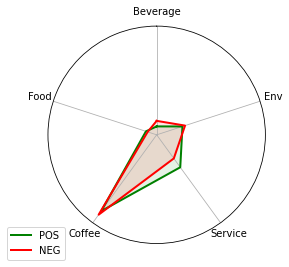

In [ ]:
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,0.6)


values=m_labels_mean.loc["POS"].drop('total').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', c="g", label="POS")
ax.fill(angles, values, 'g', alpha=0.1)

values=m_labels_mean.loc["NEG"].drop('total').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', c="r", label="NEG")
ax.fill(angles, values, 'r', alpha=0.1) 

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

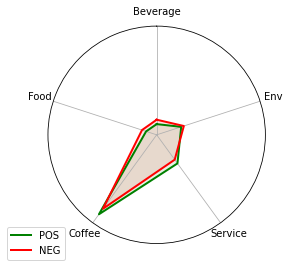

In [ ]:
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,0.6)


values=b_labels_mean.loc["POS"].drop('total').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', c="g", label="POS")
ax.fill(angles, values, 'g', alpha=0.1)

values=b_labels_mean.loc["NEG"].drop('total').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', c="r", label="NEG")
ax.fill(angles, values, 'r', alpha=0.1) 

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [ ]:
m_labels.to_csv("mannhatten_labels.csv")

In [ ]:
b_labels.to_csv("brooklyn_labels.csv")